# Anisotropy in the video classification

[Sweep data analysis](sweep_data.ipynb) の具体例として、4 種類の MakeHuman モデルに対して ResNets スコアの異方性を評価する。

このチュートリアルで使用するデータは次のリンク先からダウンロードできる（AIST internal）：
- <https://aistmail-my.sharepoint.com/:f:/g/personal/ishitsuka_hikaru_aist_go_jp/ElYVU7oewbJMoBxCKWSJjcUBcl0idteiY3ZyBAHRm2SJ-Q?e=wbpzFS>

In [1]:
%matplotlib inline
import sys
from IPython.display import Image, display
sys.path.append('../utils/')
from sweep_data import SweepData

入力となる MakeHuman モデルは次の 4 つで、モーションラベルは `walk` である：

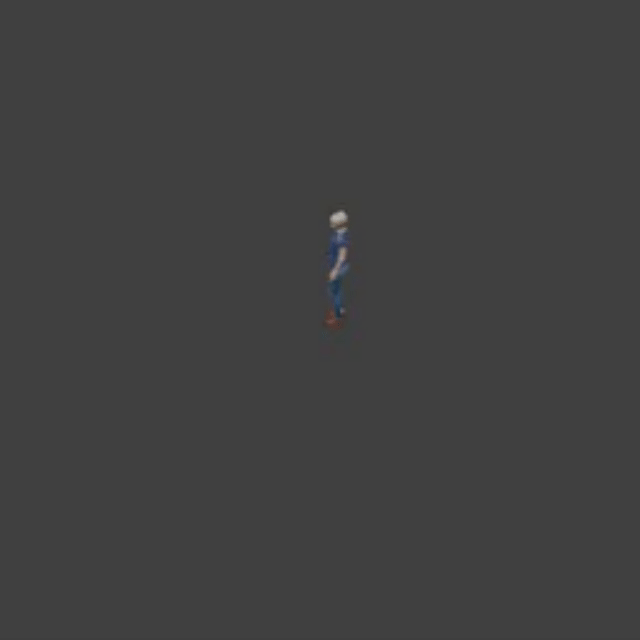

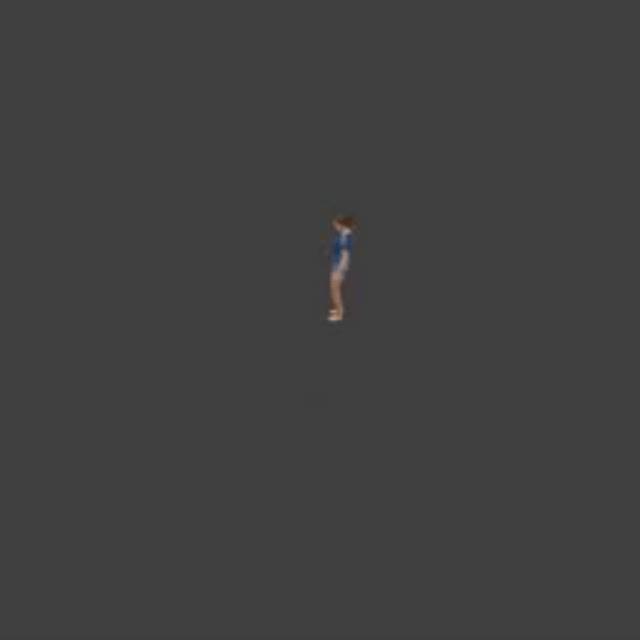

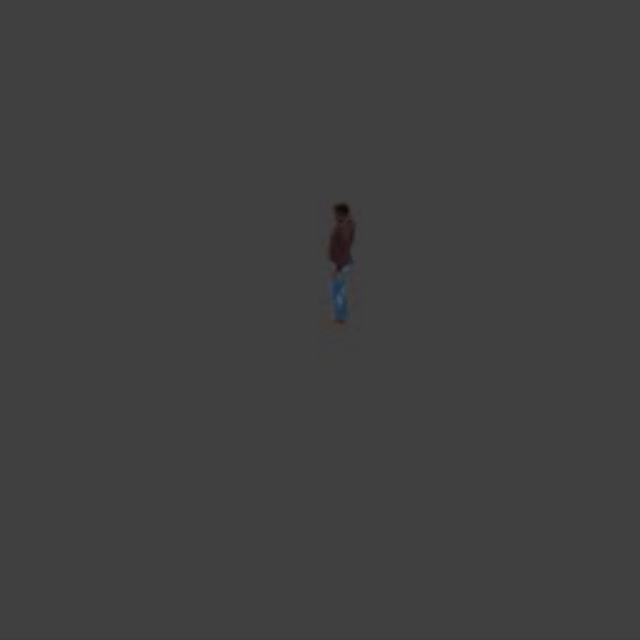

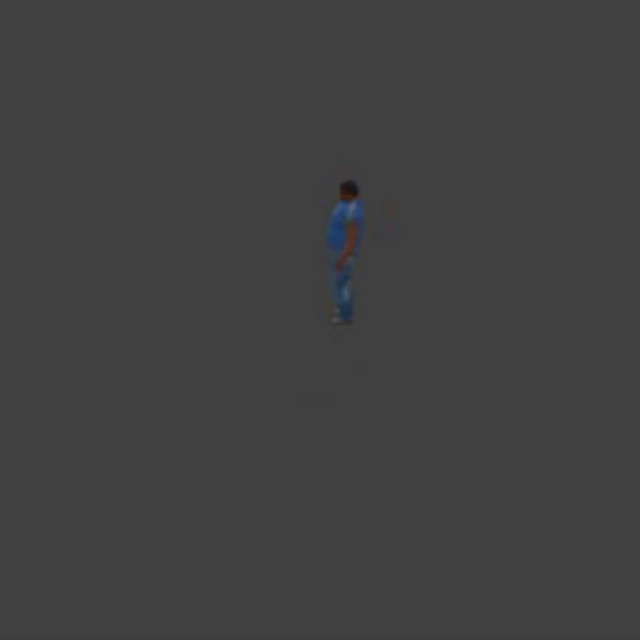

In [2]:
with open('../imgs/f00_walk_144_34_none.gif', 'rb') as f:
    display(Image(f.read(), width=256))
with open('../imgs/f02_walk_144_34_none.gif', 'rb') as f:
    display(Image(f.read(), width=256))
with open('../imgs/m02_walk_144_34_none.gif', 'rb') as f:
    display(Image(f.read(), width=256))
with open('../imgs/m03_walk_144_34_none.gif', 'rb') as f:
    display(Image(f.read(), width=256))

これらの 3D-ResNets スコアを半球面上のヒートマップで表すと次のようになる：

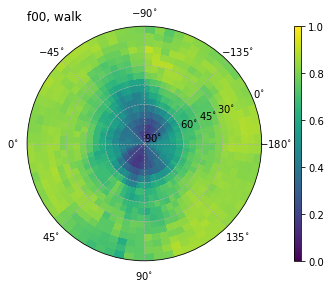

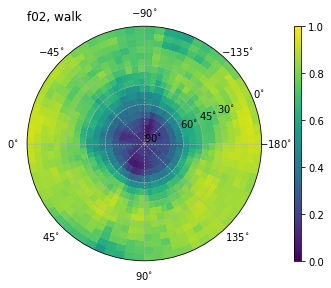

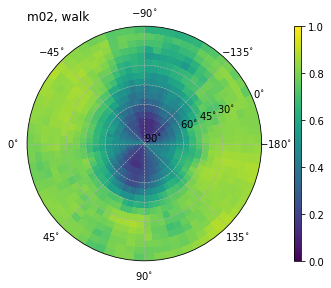

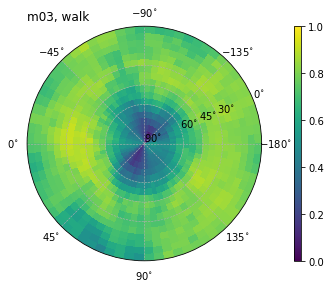

In [3]:
fpaths = [
    'data/f00_walk_r=10_lon=0-360-5_lat=0-90-5/',
    'data/f02_walk_r=10_lon=0-360-5_lat=0-90-5/',
    'data/m02_walk_r=10_lon=0-360-5_lat=0-90-5/',
    'data/m03_walk_r=10_lon=0-360-5_lat=0-90-5/'
]

for fpath in fpaths:
    sd = SweepData(
        root=fpath,
        fixed_axis='r',
        lon_range=[-180, 180, 5],
        lat_range=[0, 90, 5]
    )
    model, label, *_ = fpath.split('/')[1].split('_')
    sd.heatmap(label)
    sd.plot(projection='polar', title=f'{model}, {label}')

この例ではどのモデルも天頂近くから見た場合のスコアが小さくなっている。また、モデルによるスコアの偏りはそれほどない。

次に、緯度を 30°に固定して半球中心からの距離を 1&ndash;30 m の範囲で変化させた場合のスコアをヒートマップで表すと次のようになる：

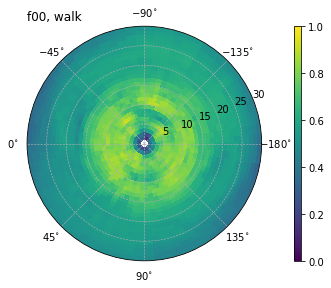

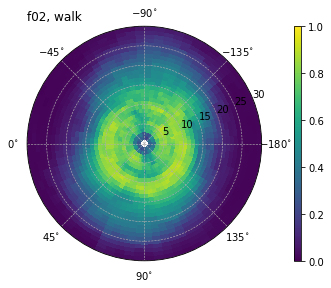

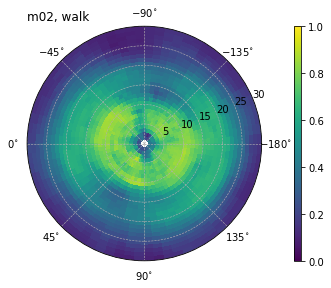

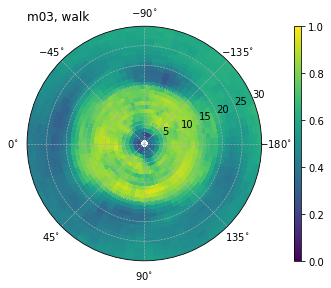

In [4]:
fpaths = [
    'data/f00_walk_r=1-30-1_lon=0-360-5_lat=30/',
    'data/f02_walk_r=1-30-1_lon=0-360-5_lat=30/',
    'data/m02_walk_r=1-30-1_lon=0-360-5_lat=30/',
    'data/m03_walk_r=1-30-1_lon=0-360-5_lat=30/'
]

for fpath in fpaths:
    sd = SweepData(
        root=fpath,
        fixed_axis='lat',
        r_range=[1, 30, 1],
        lon_range=[-180, 180, 5]
    )
    model, label, *_ = fpath.split('/')[1].split('_')
    sd.heatmap(label)
    sd.plot(projection='polar', title=f'{model}, {label}')

こちらはモデルによる偏りがある。モデル f00 とモデル m03 のスコアが比較的高く、モデル f02 のスコアが低い。モデル f02 は 15 m 以上離れるとほとんど動作を認識できていない。